In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Test & Train datasets

In [4]:
train_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Train.csv")

In [5]:
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
train_df.shape

(8068, 11)

In [7]:
test_df = pd.read_csv(r"C:\Users\dhchaudhary\Desktop\MasterProject\Data_Science_Case_Studies\Test.csv")

In [8]:
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [9]:
test_df.shape

(2627, 10)

## Exploratory Data Analysis

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [12]:
df = train_df.copy()

In [35]:
df["Profession"].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [36]:
print(df["Spending_Score"].unique())
print(df["Spending_Score"].value_counts())

['Low' 'Average' 'High']
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


In [40]:
print(df["Var_1"].unique())
print(df["Var_1"].value_counts())

['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [37]:
print(df["Family_Size"].unique())
print(df["Family_Size"].value_counts())

[ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64


c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

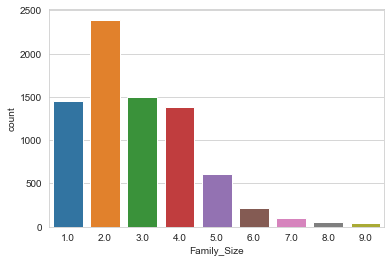

In [34]:
sns.set_style('whitegrid')
sns.countplot(df['Family_Size'])

<AxesSubplot:>

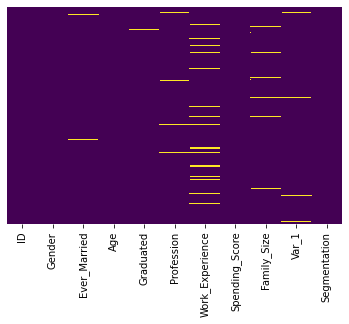

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

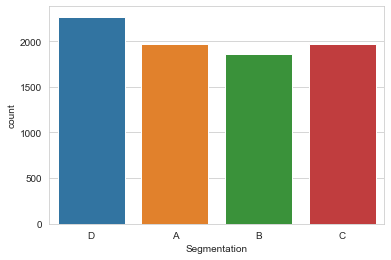

In [15]:
sns.set_style('whitegrid')
sns.countplot(df['Segmentation'])

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Segmentation', ylabel='count'>

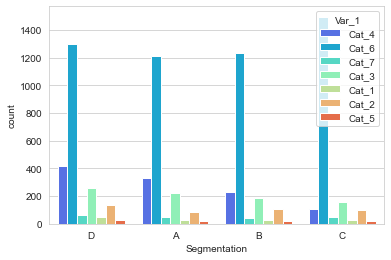

In [16]:
sns.set_style('whitegrid')
sns.countplot(df['Segmentation'], hue=df['Var_1'], palette='rainbow')

In [20]:
df.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.030688,0.011801
Age,-0.005055,1.000000,-0.190789,-0.280517
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234
Family_Size,0.011801,-0.280517,-0.063234,1.000000


c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

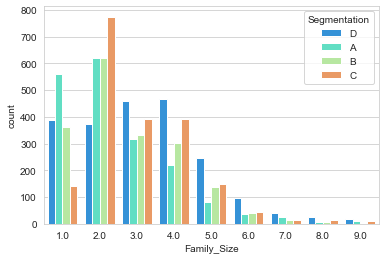

In [39]:
sns.set_style('whitegrid')
sns.countplot(df['Family_Size'], hue=df['Segmentation'], palette='rainbow')